## Observations and Insights 

In [233]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [157]:
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [256]:
# Checking the number of mice.
numb_mice=combined_study_data.groupby("Mouse ID").nunique()
numb_mice.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

In [159]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_index=pd.DataFrame(combined_data).set_index('Mouse ID')["Timepoint"]
mouseid_index

Mouse ID
k403     0
k403     5
k403    10
k403    15
k403    20
        ..
z969    25
z969    30
z969    35
z969    40
z969    45
Name: Timepoint, Length: 1893, dtype: int64

In [160]:
# Optional: Get all the data for the duplicate mouse ID. 




In [161]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [162]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summarystats = summarystats[["Tumor Volume (mm3)", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summary_stats = summarystats.rename(columns={"Tumor Volume (mm3)" : "Trials"})
summary_stats.head(10)


,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

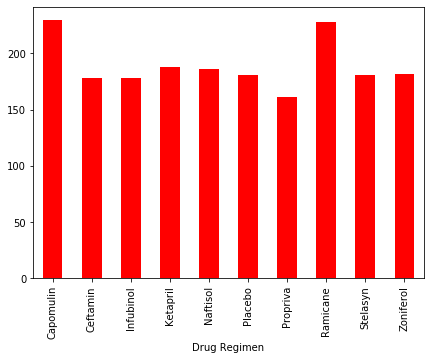

In [214]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_treatment=summary_stats[["Trials"]]

total_mice_treatment.plot(kind="bar", figsize=(7,5), color="r", legend=False)
plt.show()


([<matplotlib.axis.XTick at 0x7ffe42a922b0>,
 <a list of 10 Text xticklabel objects>)

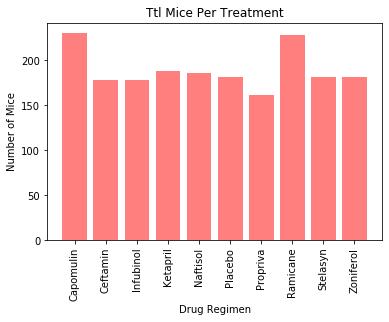

In [216]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(0, len(total_mice_treatment))
x_label=[]
for value in x_axis:
    x_label.append(value)

plt.title("Ttl Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, total_mice_treatment["Trials"], facecolor="red", alpha=0.5, align="center")
plt.xticks(x_label, total_mice_treatment.index, rotation="vertical")
#plt.show

In [318]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
summary_mice = combined_data["Sex"]
summary_mice
datapoints.plot(kind="pie", explode=explode, labels=datapoints.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution Female vs Male")
plt.show()


0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
1888    Male
1889    Male
1890    Male
1891    Male
1892    Male
Name: Sex, Length: 1893, dtype: object

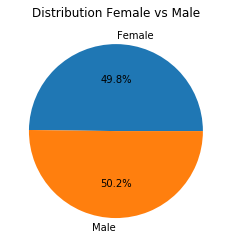

In [315]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
summary_mice = pd.DataFrame(combined_data.groupby("Sex").nunique())
summary_mice
labels=["Female", "Male"]
plt.pie(summary_mice["Mouse ID"], labels=labels, autopct="%1.1f%%")
plt.title("Distribution Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
